# Exercise 4.10 Coding Etiquette & Excel Reporting
## Part 1, Steps 5 to 9
##### By Claudia Lan Yee Chiu

## Table of Contents
###### Importing Analysis and Visualization libraries
#### 5. Customer Profiling
##### 5.1 Profiling High-Activity Customers by Age
##### 5.2 Profiling High-Activity Customers by Income
##### 5.3 Profiling High-Activity Customers by certain goods in the 'department_id' section
###### 5.3.1 Profiling Customers by Pet Owners
###### 5.3.1 Profiling Customers by Babies
##### 5.4 Profiling High-Activity Customers by Number of Dependants & Family Status
#### 6. Visualization of the Distribution of Profiles
##### 6.1 Bar Chart for IC Orders Frequency per Region
##### 6.2 Bar Chart for IC Customers per Age Group
##### 6.3 Bar Chart showing Number of Dependents of IC Customers
##### 6.4 Bar Chart of IC Customers per Income
##### 6.5 Bar Chart of the IC Product distribution
##### 6.6 Bar Chart showing IC Customers with Babies
##### 6.7 Bar Chart of IC Customers with Pets
##### 6.8 Pie Chart of the Household distribution of IC Customers
##### 6.9 Bar chart showing the orders per day of the week by Age Group
#### 7. Aggregating the variables 
##### 7.1 Age
##### 7.2 Income
##### 7.3 Family Status
##### 7.4 Household Status
##### 7.5 Family with Baby
##### 7.6 Region
##### 7.7 Loyalty Flag
#### 8. Compare customer profiles with regions and departments. Identify links between them.
##### 8.1 Department Purchases by Income group
###### 8.1a Visualization of income group and department comparison
##### 8.2 Department purchases by Age group
###### 8.2a Visualization of comparing Age Group and Department
##### 8.3 Department Purchases by Family Status
###### 8.3a Visualization of departments purchases by family status
##### 8.4 Department purchases by Household status
###### 8.4a Visualization of departments by household status
##### 8.5 Deparment Purchases by Region
###### 8.5a Visualization of deparment purchases by region
##### 8.6 IC Customer Household status by Region
###### 8.6a Visualization of Household status per region
##### 8.7 IC Customers Frequency flag by Region
###### 8.7a Visualization of IC Customers Frequency Flag per Region
##### 8.8 IC Customers Loyalty flag by Region
###### 8.8a Visualization of IC Customers loyalty flag by region
##### 8.9 Busiest Day of the Week per Region
###### 8.9a Visualization of Busiest Day of the Week per Region

#### Importing Analysis and Visualization Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign path
path = r'C:\Users\clany\OneDrive\Documents\CareerFoundry\Chap_4_Pythons Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
# Import high activity customers dataframe from Step 4
df_high_act = pd.read_pickle(os.path.join( path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [4]:
df_high_act.head(3)

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer


In [5]:
# Check shape of df
df_high_act.shape

(30964564, 35)

## 5. Customer Profiling

In [6]:
# Get information about the variables age, income, and number of dependants
df_high_act[['age', 'income', 'number_of_dependants']].describe()

,age,income,number_of_dependants
count,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,9.967587e+04,1.501819e+00
std,1.848528e+01,4.314187e+04,1.118896e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.729200e+04,1.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00
75%,6.500000e+01,1.281020e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


### 5.1 Profiling High-Activity Customers by Age

###### The age of customers range between 18 and 81 years old. Hence, four groups will be defined as follows:
###### Young adults = 18 to 34 years of age
###### Middle-aged adults = 35 to 49 years of age
###### Old adults = 50 to 64 years of age
###### Seniors = 65 years and above 

In [7]:
# Create a 'age_group' column based on the age of the customer
df_high_act.loc[(df_high_act['age'] >= 18) & (df_high_act['age']<35), 'age_group']  = 'Young Adult'

In [8]:
# Create a 'age_group' column based on the age of the customer - Middle-Aged Adult
df_high_act.loc[(df_high_act['age'] >= 35) & (df_high_act['age']<50), 'age_group']  = 'Middle-Aged Adult'

In [9]:
# Create a 'age_group' column based on the age of the customer - Old Adult
df_high_act.loc[(df_high_act['age'] >= 50) & (df_high_act['age']<65), 'age_group']  = 'Old Adult'

In [12]:
# Create a 'age_group' column based on the age of the customer - Senior
df_high_act.loc[df_high_act['age']>65, 'age_group'] = 'Senior'

In [13]:
# Check the value counts for each newly created type of customers
df_high_act['age_group'].value_counts()

Young Adult          8242295
Senior               7730834
Middle-Aged Adult    7305994
Old Adult            7220731
Name: age_group, dtype: int64

In [16]:
df_high_act.head(3)

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity_flag,age_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Young Adult
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Young Adult
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Young Adult


### 5.2 Profiling High-Activity Customers by Income

###### According to the US Census Bureau, the income range can be classified in below categories:
###### Low-Income Group: 25K to 60K
###### Middle-Income Group: 60K to 150K
###### High-Income Group: 150K and above

In [17]:
#check descriptive statistics for 'income' column
df_high_act['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [18]:
# Create a 'income_flag' column based on the customer's income
df_high_act.loc[df_high_act['income']<60000, 'income_flag'] = 'Low-income'

In [20]:
# Create a 'income_flag' column based on the customer's income
df_high_act.loc[(df_high_act['income']>=60000) & (df_high_act['income']<=150000), 'income_flag'] = 'Middle-income'

In [21]:
# Create a 'income_flag' column based on the customer's income
df_high_act.loc[df_high_act['income']>150000, 'income_flag'] = 'High-income'

In [22]:
# Check the value counts for each newly created type of customers
df_high_act['income_flag'].value_counts()

Middle-income    21267280
Low-income        5802750
High-income       3894534
Name: income_flag, dtype: int64

In [23]:
# Check shape of df
df_high_act.shape

(30964564, 36)

### 5.3 Profiling High-Activity Customers by certain goods in the 'department_id' section

In [24]:
# Import department_wranged dataset
departments= pd.read_csv(os.path.join(path,'Data', 'Prepared Data','departments_wrangled.csv'), index_col=False)

In [25]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [26]:
# Rename Unnamed:0 
departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [27]:
# Check the header again
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [28]:
# Merge the High-activity customer dataframe with the department names
df_high_customer_depts=df_high_act.merge(departments, on = 'department_id')

In [29]:
# Check the frequency of the 'departments' column
df_high_customer_depts['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

#### 5.3.1 Profiling Customers by Pet Owners

In [30]:
# Derive a new 'pet_ownership' column using loc() function
df_high_customer_depts.loc[df_high_customer_depts['department'] == 'pets', 'pet_ownership'] = 'pet owner'
df_high_customer_depts.loc[df_high_customer_depts['department'] != 'pets', 'pet_ownership'] = 'non-pet owner'

In [32]:
# Check the frequency of the 'pets_ownership' column
df_high_customer_depts['pet_ownership'].value_counts(dropna = False)

non-pet owner    30871504
pet owner           93060
Name: pet_ownership, dtype: int64

#### 5.3.2 Profiling Customers by Babies

In [33]:
# Derive a new 'baby_at_home' column using loc() function
df_high_customer_depts.loc[df_high_customer_depts['department'] == 'babies', 'baby_at_home'] = 'baby'
df_high_customer_depts.loc[df_high_customer_depts['department'] != 'babies', 'baby_at_home'] = 'no baby'

In [34]:
# Check the frequency of the 'baby_at_home' column
df_high_customer_depts['baby_at_home'].value_counts(dropna = False)

no baby    30554172
baby         410392
Name: baby_at_home, dtype: int64

### 5.4 Profiling High-Activity Customers by Number of Dependants & Family Status

In [35]:
 # Check the values in the 'number_of_dependants' column
df_high_customer_depts['number_of_dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: number_of_dependants, dtype: int64

In [37]:
# Check the values in the 'family_status' column
df_high_customer_depts['family_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: family_status, dtype: int64

In [38]:
# Create a 'household' flag for each customer's family status and dependants

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Young Adult'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Single Young Adult'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Young Adult'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Single Young Adult with Family members'

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Middle-Aged Adult'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Single Middle-Aged Adult'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Middle-Aged Adult'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Single Middle-Aged Adult with Family members'

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Old Adult'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Single Old Adult'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Old Adult'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Single Old Adult with Family members'

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Senior'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Single Senior'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (df_high_customer_depts['age_group'].isin(['Senior'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Single Senior with Family members'

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Young Adult'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Married Young Adult with NO Family members'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Young Adult'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Married Young Adult with Family members'

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Middle-Aged Adult'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Married Middle-Aged Adult with NO Family members'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Middle-Aged Adult'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Married Middle-Aged Adult with Family members'

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Old Adult'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Married Old Adult with NO Family members'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Old Adult'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Married Old Adult with Family members'

df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Senior'])) & (df_high_customer_depts['number_of_dependants']==0), 'household_status'] = 'Married Senior with NO Family members'
df_high_customer_depts.loc[(df_high_customer_depts['family_status'].isin(['married'])) & (df_high_customer_depts['age_group'].isin(['Senior'])) & (df_high_customer_depts['number_of_dependants']>=1), 'household_status'] = 'Married Senior with Family members'

In [39]:
# Check new columns via header
df_high_customer_depts.head(3)

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,family_status,income,region,activity_flag,age_group,income_flag,department,pet_ownership,baby_at_home,household_status
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,married,40423,South,high activity customer,Young Adult,Low-income,beverages,non-pet owner,no baby,Married Young Adult with Family members
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,married,40423,South,high activity customer,Young Adult,Low-income,beverages,non-pet owner,no baby,Married Young Adult with Family members
2,473747,1,prior,3,3,12,21.0,196,1,1,...,married,40423,South,high activity customer,Young Adult,Low-income,beverages,non-pet owner,no baby,Married Young Adult with Family members


In [40]:
# Check columns
df_high_customer_depts.columns

Index(['order_id', 'user_id', 'eval_set', 'number_of_orders',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_order', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income', 'region', 'activity_flag', 'age_group', 'income_flag',
       'department', 'pet_ownership', 'baby_at_home', 'household_status'],
      dtype='object')

## 6. Create an appropriate visualization to show the distribution of profiles

### 6.1 Bar Chart for IC Orders Frequency per Region 

Text(0.5, 0, 'Regions')

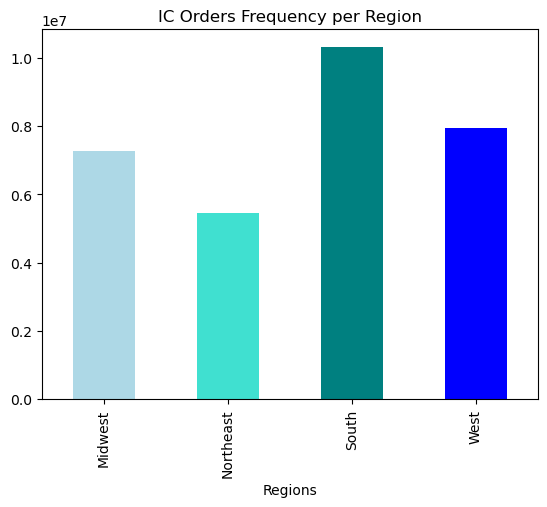

In [42]:
# Create Bar Chart from the 'Region' column - was already created and saved via Step 3c

regional_distrib = df_high_customer_depts['region'].value_counts().sort_index().plot.bar(color = ['lightblue', 'turquoise', 'teal', 'blue'])
plt.title('IC Orders Frequency per Region')
plt.xlabel('Regions')

### 6.2 Bar Chart for IC Customers per Age Group

Text(0, 0.5, 'Frequency')

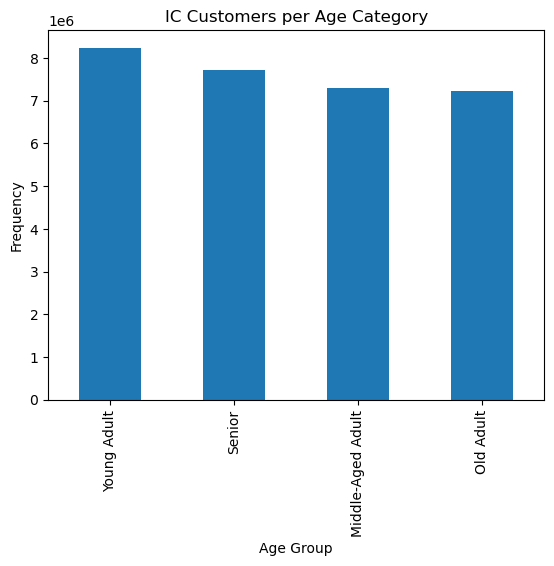

In [45]:
# Create a bar chart from the 'Age_group' column
age_distribution_bar = df_high_customer_depts['age_group'].value_counts().plot.bar()
plt.title('IC Customers per Age Category')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

In [46]:
# Export above bar chart as image file
age_distribution_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_distribution_bar.png'))

### 6.3 Bar Chart showing Number of Dependents of IC Customers

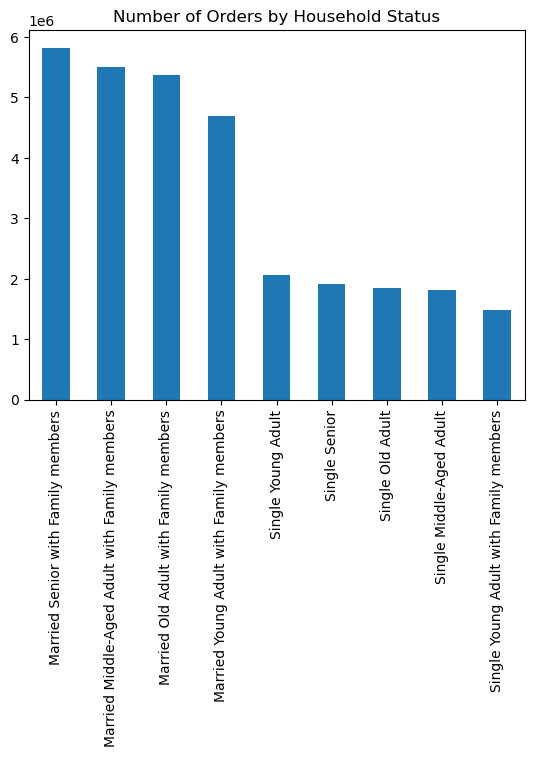

In [69]:
# Creating a bar chart to show the number of dependants per household
household_status_bar = df_high_customer_depts['household_status'].value_counts().plot.bar()
plt.title('Number of Orders by Household Status')
plt.show()

### 6.4 Bar Chart of IC Customers per Income

Text(0, 0.5, 'Frequency')

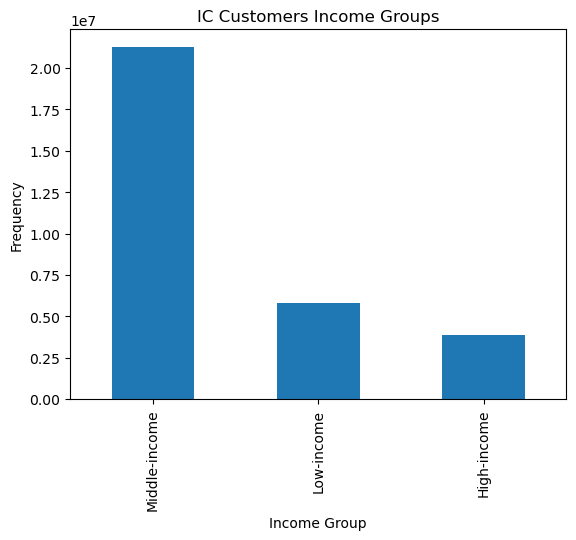

In [48]:
# Create a bar chart from the 'income' column
income_group_bar = df_high_customer_depts['income_flag'].value_counts().plot.bar()
plt.title('IC Customers Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Frequency')

In [49]:
# Export above bar chart as image file
income_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_group_bar.png'))

### 6.5 Bar Chart of the IC Product distribution

Text(-47.527777777777786, 0.5, 'Department')

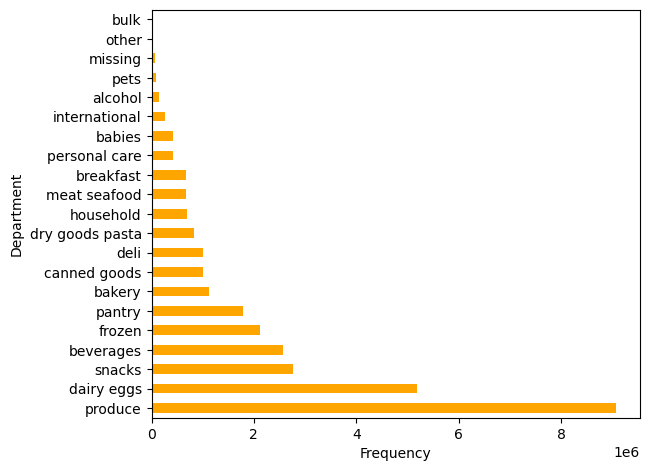

In [51]:
# Create a bar chart of Products distribution per department
departments_distribution_bar = df_high_customer_depts['department'].value_counts().plot.barh(color='orange')
plt.tight_layout()
plt.xlabel('Frequency')
plt.ylabel('Department')

In [52]:
# Export above bar chart as image file
departments_distribution_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'departments_distribution_bar.png'))

### 6.6 Bar Chart showing IC Customers with Babies

Text(0.5, 1.0, 'IC Customers with Babies')

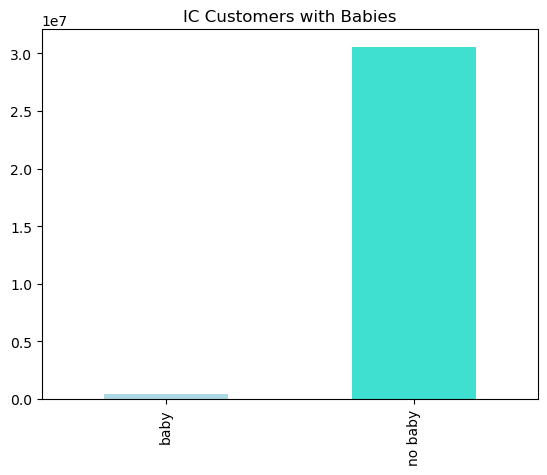

In [55]:
# Create a bar chart with IC customers with or without babies at home
baby_bar = df_high_customer_depts['baby_at_home'].value_counts().sort_index().plot.bar(color = ['lightblue', 'turquoise'])
plt.title('IC Customers with Babies')

In [56]:
# Export above bar chart as image file
baby_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'baby_at_home_bar.png'))

### 6.7 Bar Chart of IC Customers with Pets

Text(0.5, 1.0, 'IC Pet Owner Customers')

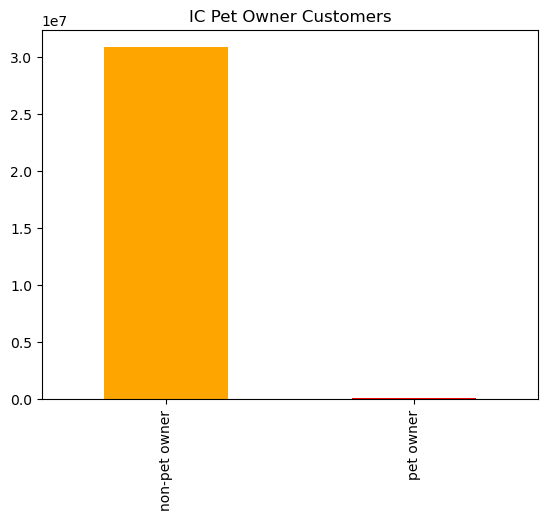

In [58]:
# Create a bar chart with IC customers with or without babies at home
pet_owners_bar = df_high_customer_depts['pet_ownership'].value_counts().sort_index().plot.bar(color = ['orange', 'red'])
plt.title('IC Pet Owner Customers')

In [60]:
# Export above bar chart as image file
pet_owners_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pet_owners_bar.png'))

### 6.8 Pie Chart of the Household distribution of IC Customers

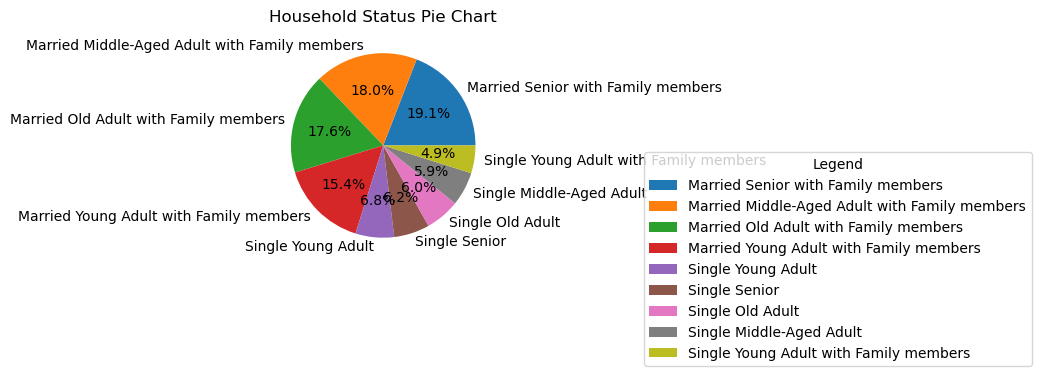

In [62]:
# Create a pie chart for the household status distribution
household_status_pie=df_high_customer_depts['household_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()

# Add a title
plt.title('Household Status Pie Chart')
plt.xlabel('')
plt.ylabel('')

# Add a legend
plt.legend(title='Legend', bbox_to_anchor=(1.6, 0.5))

In [63]:
# Export above pie chart as image file
household_status_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'household_status_pie.png'))

### 6.9 Bar chart showing the orders per day of the  week by Age Group

In [66]:
# Check Age Group with orders_day_of_week
age_group_order_days_week = pd.crosstab(df_high_customer_depts['orders_day_of_week'],df_high_customer_depts['age_group'],dropna=False)

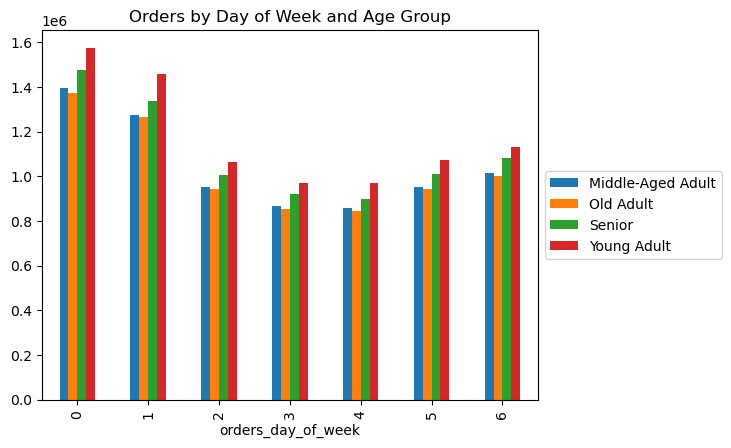

In [67]:
# Create a bar chart between Age Group with orders_day_of_week

age_group_order_days_week_viz = age_group_order_days_week.plot.bar()
plt.title('Orders by Day of Week and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [68]:
# Export above bar chart as image file
age_group_order_days_week_viz.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_order_days_week_viz.png'))

## 7. Creating a Customer-profile Aggregation for Usage Frequency and Expenditure

### 7.1  Age

In [70]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_age = df_high_customer_depts.groupby('age_group').agg({'order_id':['count'],'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [71]:
crosstab_age

order_id days_since_prior_order                  prices  \
                     count                    min       mean   max    min   
age_group                                                                   
Middle-Aged Adult  7305994                    0.0  10.787539  30.0    1.0   
Old Adult          7220731                    0.0  10.839010  30.0    1.0   
Senior             7730834                    0.0  10.795536  30.0    1.0   
Young Adult        8242295                    0.0  10.823742  30.0    1.0   

                                       
                        mean      max  
age_group                              
Middle-Aged Adult  12.111437  99999.0  
Old Adult          11.724176  99999.0  
Senior             11.828109  99999.0  
Young Adult        12.133971  99999.0

### 7.2 Income

In [74]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

income_agg = df_high_customer_depts.groupby('income_flag').agg({'order_id':['count'],'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [75]:
income_agg

order_id days_since_prior_order                  prices  \
                  count                    min       mean   max    min   
income_flag                                                              
High-income     3894534                    0.0  10.684293  30.0    1.0   
Low-income      5802750                    0.0  11.049796  30.0    1.0   
Middle-income  21267280                    0.0  10.768251  30.0    1.0   

                                   
                    mean      max  
income_flag                        
High-income    32.620080  99999.0  
Low-income      7.091202  14900.0  
Middle-income   9.466551  99999.0

### 7.3 Family status

In [77]:
family_status_agg = df_high_customer_depts.groupby('family_status').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],'prices': ['min', 'mean', 'max']})

In [78]:
family_status_agg

order_id days_since_prior_order             \
                                     count                    min       mean   
family_status                                                                  
divorced/widowed                   2645271                    0.0  10.750328   
living with parents and siblings   1481172                    0.0  10.750995   
married                           21743711                    0.0  10.820875   
single                             5094410                    0.0  10.813571   

                                       prices                      
                                   max    min       mean      max  
family_status                                                      
divorced/widowed                  30.0    1.0  11.532741  99999.0  
living with parents and siblings  30.0    1.0  10.890167  99999.0  
married                           30.0    1.0  11.944390  99999.0  
single                            30.0    1.0  12.398586  99999.0

### 7.4 Household status

In [79]:
household_status_agg = df_high_customer_depts.groupby('household_status').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],'prices': ['min', 'mean', 'max']})

In [80]:
household_status_agg

order_id days_since_prior_order  \
                                                 count                    min   
household_status                                                                
Married Middle-Aged Adult with Family members  5495243                    0.0   
Married Old Adult with Family members          5377317                    0.0   
Married Senior with Family members             5825113                    0.0   
Married Young Adult with Family members        4697565                    0.0   
Single Middle-Aged Adult                       1810751                    0.0   
Single Old Adult                               1843414                    0.0   
Single Senior                                  1905721                    0.0   
Single Young Adult                             2063558                    0.0   
Single Young Adult with Family members         1481172                    0.0   

                                                               prices  \
                                                    mean   max    min   
household_status                                                        
Married Middle-Aged Adult with Family members  10.773937  30.0    1.0   
Married Old Adult with Family members          10.898644  30.0    1.0   
Married Senior with Family members             10.798944  30.0    1.0   
Married Young Adult with Family members        10.815045  30.0    1.0   
Single Middle-Aged Adult                       10.828845  30.0    1.0   
Single Old Adult                               10.665304  30.0    1.0   
Single Senior                                  10.785123  30.0    1.0   
Single Young Adult                             10.895824  30.0    1.0   
Single Young Adult with Family members         10.750995  30.0    1.0   

                                                                   
                                                    mean      max  
household_status                                                   
Married Middle-Aged Adult with Family members  11.714167  99999.0  
Married Old Adult with Family members          12.003285  99999.0  
Married Senior with Family members             11.751495  99999.0  
Married Young Adult with Family members        12.499513  99999.0  
Single Middle-Aged Adult                       13.317066  99999.0  
Single Old Adult                               10.910004  99999.0  
Single Senior                                  12.062293  99999.0  
Single Young Adult                             12.194608  99999.0  
Single Young Adult with Family members         10.890167  99999.0

### 7.5 Family with Baby 

In [82]:
baby_at_home_agg = df_high_customer_depts.groupby('baby_at_home').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],'prices': ['min', 'mean', 'max']})

In [83]:
baby_at_home_agg

order_id days_since_prior_order                  prices  \
                 count                    min       mean   max    min   
baby_at_home                                                            
baby            410392                    0.0   9.780844  30.0    1.0   
no baby       30554172                    0.0  10.824248  30.0    1.0   

                                  
                   mean      max  
baby_at_home                      
baby           7.634399     15.0  
no baby       11.991265  99999.0

### 7.6 Region

In [84]:
region_agg = df_high_customer_depts.groupby('region').agg({'order_id':['count'],'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [85]:
region_agg

order_id days_since_prior_order                  prices             \
              count                    min       mean   max    min       mean   
region                                                                          
Midwest     7261513                    0.0  10.892736  30.0    1.0  12.681835   
Northeast   5464685                    0.0  10.774220  30.0    1.0  11.542582   
South      10311139                    0.0  10.814227  30.0    1.0  12.118845   
West        7927227                    0.0  10.754622  30.0    1.0  11.276491   

                    
               max  
region              
Midwest    99999.0  
Northeast  99999.0  
South      99999.0  
West       99999.0

### 7.7 Loyalty Flag

In [86]:
loyalty_flag_agg = df_high_customer_depts.groupby('loyalty_flag').agg({'order_id':['count'],'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [87]:
loyalty_flag_agg

order_id days_since_prior_order                  prices  \
                     count                    min       mean   max    min   
loyalty_flag                                                                
Loyal Customer    10284093                    0.0   6.026656  30.0    1.0   
New Customer       4803695                    0.0  17.598691  30.0    1.0   
Regular Customer  15876776                    0.0  12.155135  30.0    1.0   

                                      
                       mean      max  
loyalty_flag                          
Loyal Customer    10.386336  99999.0  
New Customer      13.387725  99999.0  
Regular Customer  12.495717  99999.0

# 8. Compare customer profiles with regions and departments. Identify links between them.

### 8.1 Department Purchases by Income group

In [89]:
# create crosstab from 'region' & 'income_flag' columns
cross_dept_inc = pd.crosstab(df_high_customer_depts['department'], df_high_customer_depts['income_flag'], dropna = False)

In [90]:
cross_dept_inc

income_flag,High-income,Low-income,Middle-income
department,,,
alcohol,24067,28592,91968
babies,53001,57246,300145
bakery,148430,192127,780271
beverages,313325,594583,1663993
breakfast,83418,146969,440463
bulk,3671,7300,22480
canned goods,132389,156173,723512
dairy eggs,659149,902958,3615075
deli,125886,185277,692671


#### 8.1a Visualization of income group and department comparison

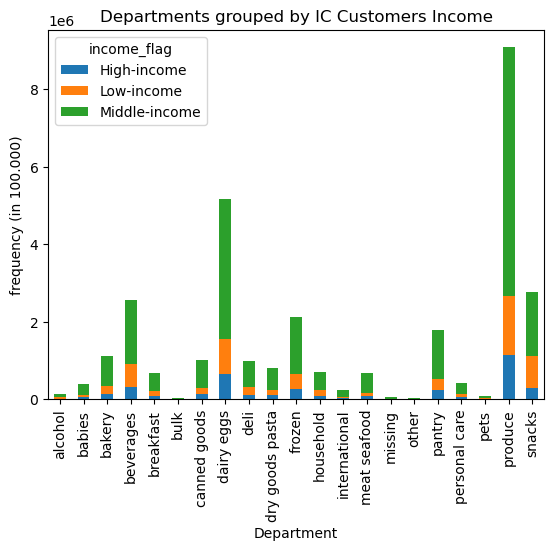

In [98]:
# plot stacked bar chart
cross_dept_inc.plot(kind='bar', stacked=True)

# set chart title and axis labels
plt.title('Departments grouped by IC Customers Income')
plt.xlabel('Department')
plt.ylabel('frequency (in 100.000)')

#save image
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dept_income_bar.png'))

# show chart
plt.show()

### 8.2 Department purchases by Age group

In [100]:
# create crosstab from 'department' & 'age_group' columns
cross_dept_age = pd.crosstab(df_high_customer_depts['department'], df_high_customer_depts['age_group'], dropna = False)

In [101]:
cross_dept_age

age_group,Middle-Aged Adult,Old Adult,Senior,Young Adult
department,,,,
alcohol,33876,33841,34691,40217
babies,101228,95660,100162,107300
bakery,263892,262218,278458,298721
beverages,603825,607039,646414,677017
breakfast,157925,157306,165491,180323
bulk,7987,7498,8336,9021
canned goods,237742,236038,251940,270785
dairy eggs,1226938,1195871,1291039,1386301
deli,237774,234391,250463,266470


#### 8.2a Visualization of comparing Age Group and Department

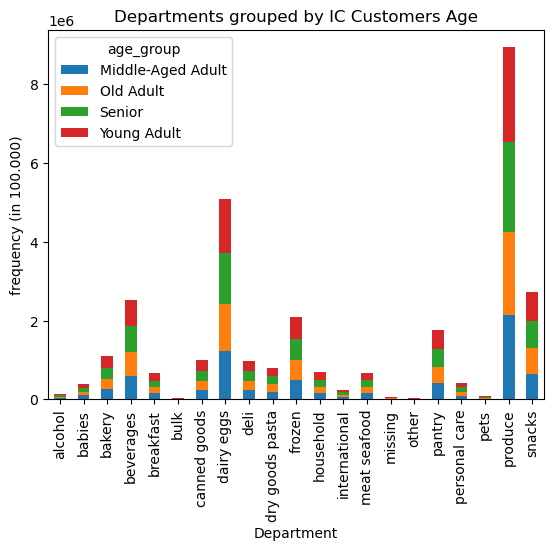

In [102]:
# plot stacked bar chart
cross_dept_age.plot(kind='bar', stacked=True)

# set chart title and axis labels
plt.title('Departments grouped by IC Customers Age')
plt.xlabel('Department')
plt.ylabel('frequency (in 100.000)')

#save image
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dept_age_bar.png'))
# show chart
plt.show()

### 8.3 Department Purchases by Family Status

In [108]:
# Create crosstab from 'department' & 'family_status' columns
dep_by_fam_type = pd.crosstab(df_high_customer_depts['department'],df_high_customer_depts['family_status'], dropna = False)

In [109]:
dep_by_fam_type

family_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442602,250207,3632599,851774
deli,86749,48119,702333,166633


#### 8.3a Visualization of departments purchases by family status

In [157]:
# Setting color variable
fam_colors = ['violet', 'mediumorchid', 'rebeccapurple', 'fuchsia']

Text(0.5, 1.0, 'Department Purchasing by Family Type')

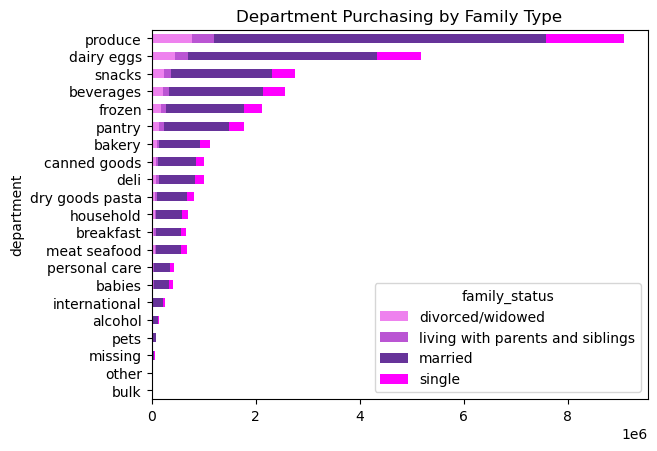

In [158]:
# Visualizing relationship
dep_by_fam_type_bar = dep_by_fam_type.sort_values(by=['single'], ascending=True).plot.barh(color = fam_colors, stacked = True)
plt.title("Department Purchasing by Family Type")

In [113]:
# Export 
dep_by_fam_type_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_by_fam_type_bar.png'))

### 8.4 Department purchases by Household status

In [114]:
# Create crosstab from 'department' & 'household_status' columns
dep_by_hh_type = pd.crosstab(df_high_customer_depts['department'],df_high_customer_depts['household_status'], dropna = False)

In [115]:
dep_by_hh_type

household_status,Married Middle-Aged Adult with Family members,Married Old Adult with Family members,Married Senior with Family members,Married Young Adult with Family members,Single Middle-Aged Adult,Single Old Adult,Single Senior,Single Young Adult,Single Young Adult with Family members
department,,,,,,,,,
alcohol,24840,24850,26043,22177,9036,8991,8648,9661,8379
babies,75578,71597,75939,60196,25650,24063,24223,27723,19381
bakery,198050,194758,210329,169362,65842,67460,68129,75675,53684
beverages,451513,453556,487713,387006,152312,153483,158701,170904,119107
breakfast,119051,116869,126060,102490,38874,40437,39431,44635,33198
bulk,6048,5704,6393,5215,1939,1794,1943,2173,1633
canned goods,178650,176342,191286,154819,59092,59696,60654,67489,48477
dairy eggs,925762,886874,972122,790691,301176,308997,318917,345403,250207
deli,178621,172626,188636,151255,59153,61765,61827,67096,48119


#### 8.4a Visualization of departments by household status

In [116]:
# Setting color variable
hh_colors = ['powderblue', 'lightskyblue', 'cornflowerblue', 'cyan', 'royalblue', 'mediumblue', 'blue', 'navy', 'darkblue']

Text(0.5, 1.0, 'Department Purchasing by Household Type')

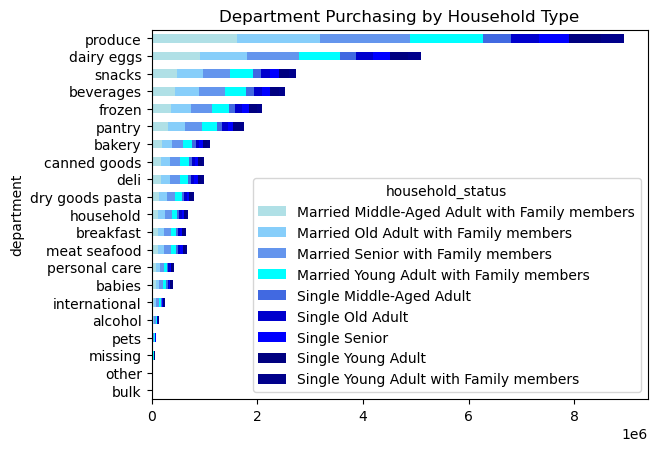

In [117]:
# Visualizing relationship
dep_by_hh_type_bar = dep_by_hh_type.sort_values(by=['Single Young Adult with Family members'], ascending=True).plot.barh(color = hh_colors, stacked = True)
plt.title("Department Purchasing by Household Type")

In [118]:
# Export 
dep_by_hh_type_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_by_hh_type_bar.png'))

### 8.5 Department Purchases by Region

In [119]:
# Create crosstab from 'department' & 'region' columns
dep_by_reg_type = pd.crosstab(df_high_customer_depts['department'],df_high_customer_depts['region'], dropna = False)

In [120]:
dep_by_reg_type

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


#### 8.5a Visualization of deparment purchases by region

In [121]:
# Setting color variable
reg_colors = ['lime', 'mediumseagreen', 'forestgreen', 'darkgreen']

Text(0.5, 1.0, 'Department Purchasing by Region')

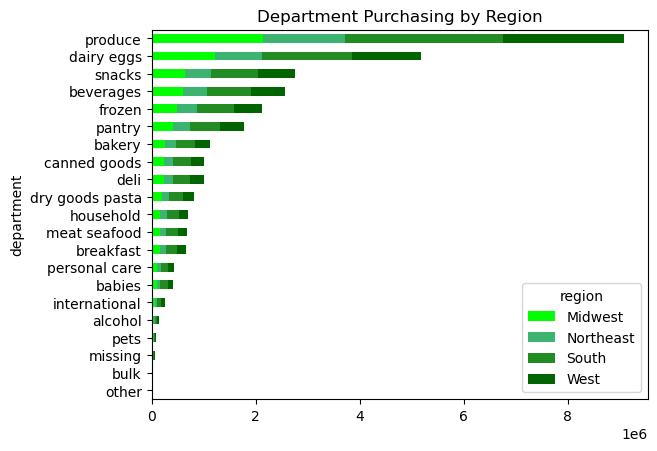

In [122]:
# Visualizing relationship
dep_by_reg_type_bar = dep_by_reg_type.sort_values(by=['West'], ascending=True).plot.barh(color = reg_colors, stacked = True)
plt.title('Department Purchasing by Region')

In [123]:
# Export 
dep_by_reg_type_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_by_reg_type_bar.png'))

### 8.6 IC Customer Household status by Region

In [124]:
# Create crosstab from 'household_status' & 'region' columns
hh_by_reg_type = pd.crosstab(df_high_customer_depts['household_status'],df_high_customer_depts['region'], dropna = False)

In [125]:
hh_by_reg_type

region,Midwest,Northeast,South,West
household_status,,,,
Married Middle-Aged Adult with Family members,1302201,974188,1816890,1401964
Married Old Adult with Family members,1257430,945424,1788114,1386349
Married Senior with Family members,1351221,1037973,1936963,1498956
Married Young Adult with Family members,1093666,828193,1568021,1207685
Single Middle-Aged Adult,443728,289040,624023,453960
Single Old Adult,442235,303151,605193,492835
Single Senior,448385,356517,612071,488748
Single Young Adult,466772,383452,694980,518354
Single Young Adult with Family members,351435,256430,505457,367850


#### 8.6a Visualization of Household status per region

In [142]:
# Setting color variable
hhreg_colors = ['pink', 'orchid', 'mediumorchid', 'purple']

Text(0.5, 1.0, 'Household Status per Region')

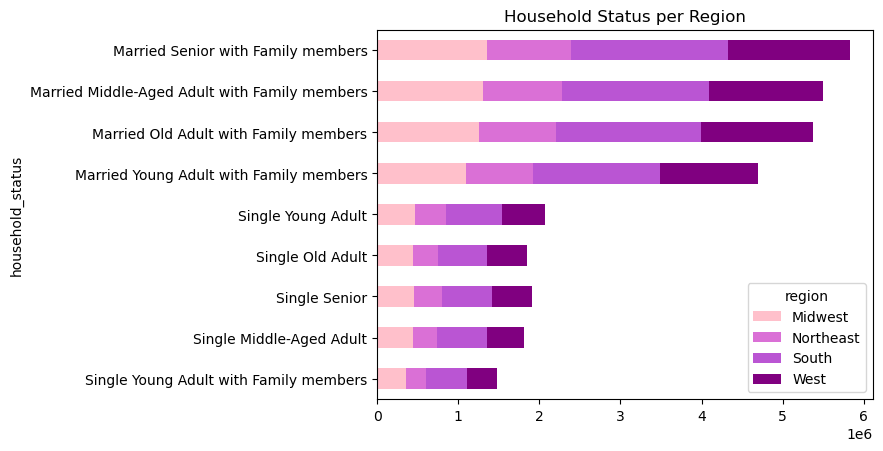

In [130]:
# Visualizing relationship
hh_by_reg_type_bar = hh_by_reg_type.sort_values(by=['West'], ascending=True).plot.barh(color = hhreg_colors, stacked = True)
plt.title('Household Status per Region')

In [131]:
# Export 
hh_by_reg_type_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hh_by_reg_type_bar.png'))

### 8.7 IC Customers Frequency flag by Region

In [153]:
# Create crosstab from 'frequency flag' & 'region' columns
frequency_by_reg = pd.crosstab(df_high_customer_depts['region'],df_high_customer_depts['frequency_flag'], dropna = False)

In [139]:
frequency_by_reg

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,3749776,637879,2873858
Northeast,2898566,469569,2096550
South,5386210,898005,4026924
West,4200029,679846,3047352


#### 8.7a Visualization of IC Customers Frequency Flag per Region

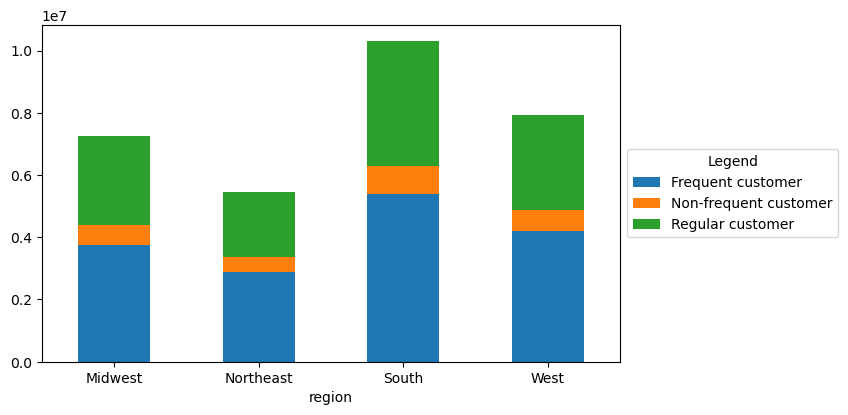

In [151]:
# Visualizing relationship
frequency_by_reg_bar=frequency_by_reg.plot.bar(stacked=True)
plt.tight_layout()
plt.xticks(rotation=0) 
plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

In [152]:
# Export 
frequency_by_reg_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'frequency_by_reg_bar.png'))

### 8.8 IC Customers Loyalty flag by Region

In [154]:
# Create crosstab from 'loyalty flag' & 'region' columns
loyalty_by_reg = pd.crosstab(df_high_customer_depts['region'],df_high_customer_depts['loyalty_flag'], dropna = False)

In [155]:
loyalty_by_reg

loyalty_flag,Loyal Customer,New Customer,Regular Customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


#### 8.8a Visualization of IC Customers loyalty flag by region

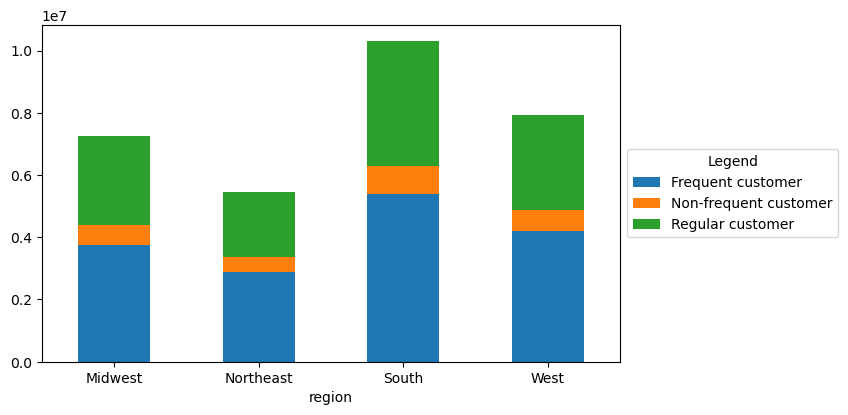

In [156]:
# Visualizing relationship
loyalty_by_reg_bar=frequency_by_reg.plot.bar(stacked=True)
plt.tight_layout()
plt.xticks(rotation=0) 
plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

### 8.9 Busiest Day of the Week per Region

In [159]:
# Create crosstab from 'orders_day_of_week' & 'region' columns
ord_day_week_reg = pd.crosstab(df_high_customer_depts['region'],df_high_customer_depts['orders_day_of_week'], dropna = False)

In [160]:
ord_day_week_reg

orders_day_of_week,0,1,2,3,4,5,6
region,,,,,,,
Midwest,1390189,1263655,947370,855316,851501,943396,1010086
Northeast,1043698,954332,713159,649305,637781,716128,750282
South,1955352,1808348,1340387,1229002,1205497,1342849,1429704
West,1519371,1385351,1023790,935912,930215,1031356,1101232


#### 8.9a Visualization of Busiest Day of the Week per Region

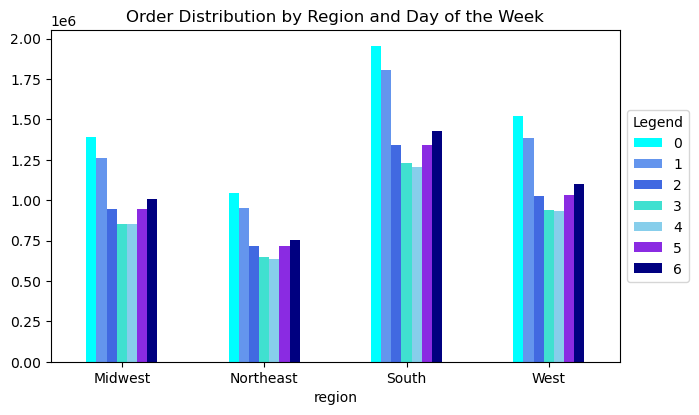

In [169]:
# Visualizing relationship
ord_day_week_reg_bar = ord_day_week_reg.plot.bar(color = ['aqua', 'cornflowerblue', 'royalblue', 'turquoise', 'skyblue', 'blueviolet', 'navy'])
plt.title("Order Distribution by Region and Day of the Week")
plt.tight_layout()
plt.xticks(rotation=0) 
plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

In [170]:
# Export 
ord_day_week_reg_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'ord_day_week_reg_bar.png'))

Among all customer profiles, the South stands out as the region where orders occur most frequently, with the highest order frequency. 
Conversely, the Northeast records the lowest order frequency. Additionally, the region with the largest number of frequent IC customers is also the South, while the Northeast once again ranks at the lowest position in this regard.
Across all regions, the married middle-aged adult and middle income profile surprisingly exhibits a much higher order frequency than the upper income profile, making it the customer profile with the highest frequency. 

## 9. Produce suitable charts to illustrate your results and export them in your project folder

##### All visualization charts have been produced above and have been exported the 'Analysis', 'Visualizations' sub-folder of the 'Instacart Basket Analysis' folder.